### Principal Component Analysis

 - PCA is a dimension reduction technique
 - Happens in two steps:
     - decorrelation
         - PCA rotates data samples to be aligned with coordinate axes
         - PCA shifts data samples so their mean is zero
         - no information is lost
     - dimension reduction
         - intrinsic dimension of a dataset = the number of features needed to approximate the dataset
         - what is the most compact representation of the data
         - PCA identifies intrinsic dimension when samples have any number of features
         - intrinsic dimension = number of PCA features with significant variance
         <img src="ml_assets/pca.png" style="width: 800px;"/>
 - The first principal component of the data is the direction in which the data varies the most
 - Lower variance features are assumed to be "noise"
 - Learn more: https://en.wikipedia.org/wiki/Principal_component_analysis

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

In [27]:
wines = load_wine()
features = pd.DataFrame(scale(wines['data']), columns = wines['feature_names'])

target = pd.DataFrame(wines['target'], columns=['type'])

df = pd.concat([target,features],axis=1)
df.shape

(178, 14)

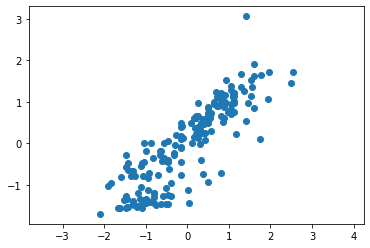

0.8645635000951151 0.0


In [28]:
v1 = df['total_phenols']
v2 = df['flavanoids']

plt.scatter(v1, v2)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(v1, v2)

# Display the correlation
print(correlation, round(pvalue,10))


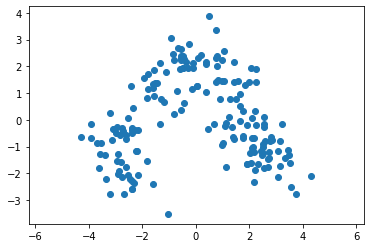

6.036837696399289e-16


In [29]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(df.iloc[:,1:])

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

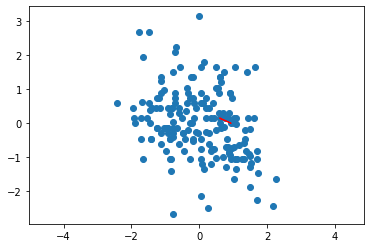

In [35]:
# Make a scatter plot of the untransformed points
plt.scatter(df.iloc[:,1], df.iloc[:,4])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(df)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

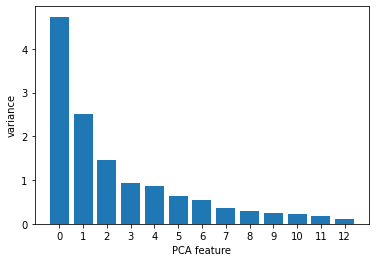

In [42]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df.iloc[:,1:])

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [46]:
# Create a PCA instance with 2 components: pca
scaled_features = pd.DataFrame(scale(wines['data']), columns = wines['feature_names'])

pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_features)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_features)

# Print the shape of pca_features
print(pca_features.shape)


(178, 2)
